Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

loading the dataset 

In [2]:
ir = pd.read_csv('iris.csv')
ir.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X=ir.iloc[:,[1,2,3,4]].values
from sklearn.cluster import KMeans
wcss=[]

#this loop will fit the k-means algorithm to our data
#we will compute the within cluster sum of squares and appended to our wcss list.

In [4]:
 for i in range(1,11): #i above is between 1-10 numbers. init parameter is the random initialization method
    kmeans= KMeans(n_clusters=i,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0).fit(X)
    wcss.append(kmeans.inertia_)
    #kmeans inertia_ attribute is: Sum of squared distances of samples to their closest cluster center.

D:\ana\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to
 find the final clusters when the K-means algorithm is running.
 kmeans algorithm fits to the X dataset.
   

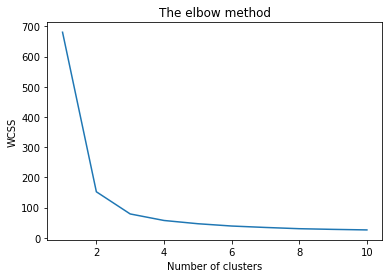

In [5]:

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

According to the Elbow graph we deterrmine the clusters number which is _3 

Now we will apply _Kmeans to the dataset

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
# We are going to use the fit predict method that returns for each
#observation which cluster it belongs to.
#single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)

In [7]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
g=X[y_kmeans == 0, 0], X[y_kmeans == 0, 1]
g

(array([7. , 6.4, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1,
        5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 5.8, 4.9, 5.7, 5.8,
        6. , 5.6, 6.3, 6.2, 6.1, 6.3, 6. , 5.8, 6.3, 5.9]),
 array([3.2, 3.2, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9,
        2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8,
        2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
        3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 2.7, 2.5, 2.5, 2.8,
        2.2, 2.8, 2.7, 2.8, 3. , 2.8, 3. , 2.7, 2.5, 3. ]))

Visualizing the clusters

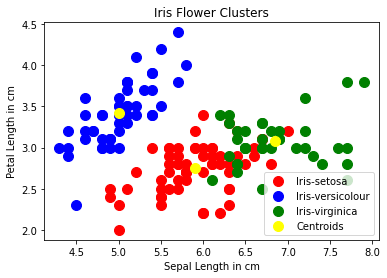

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()